In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder as onehot
from sklearn.compose import ColumnTransformer 
import copy
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
#from sqlalchemy import create_engine
from sklearn.metrics import confusion_matrix, classification_report
import string
#from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# import torch
# import torch.nn as nn
# from torch.autograd import Variable
# import torchvision.transforms as transforms
# import torchvision.datasets as dsets
from sklearn.decomposition import PCA,TruncatedSVD, IncrementalPCA
from scipy.sparse import random as sparse_random
from sklearn.random_projection import sparse_random_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import mean_squared_error as MSE 

In [2]:
df = pd.read_csv("mod_train.csv")

In [15]:

# create columns for month, year, delay
# area specific discount rate
# divide states into categories
# base price of each item
# discount adjusted 
# discount vs profit
# boruta feature selection 

In [11]:
#df_arr = df.to_numpy()
#print(df_arr)

df_cp = df.copy()


df_darr = df_cp.drop(['id','Unnamed: 0','departure city','location','class','RID','departure state','delivery date','placement date','address code'],axis=1)
print(df_darr)

      discount    price  no of items    segment   sub-class   delivery type  \
0          0.2   16.448            2   Consumer       phone  Standard Class   
1          0.0   29.700            5   Consumer     headset  Standard Class   
2          0.0   14.730            3   Consumer      shorts  Standard Class   
3          0.0   43.920            3   Consumer  television  Standard Class   
4          0.0   66.580            2   Consumer      laptop  Standard Class   
...        ...      ...          ...        ...         ...             ...   
6695       0.0  542.940            3   Consumer     battery  Standard Class   
6696       0.2  276.784            2  Corporate     headset  Standard Class   
6697       0.0    2.040            1   Consumer       watch  Standard Class   
6698       0.1  207.846            3  Corporate     tshirts    Second Class   
6699       0.2  160.776            3   Consumer  colddrinks  Standard Class   

        profit  year  month  delay  
0       5.5512

In [9]:
# df_darr['F_price'] = df_cp['price']*df_cp['no of items']
# df_darr.drop(['price','no of items'], axis = 1, inplace =True)

In [12]:
df_arr = df_darr.to_numpy()
df_arr            # discount, price, no. items, segment, sub-class, del.type, profit, year, month, delay

array([[0.2, 16.448, 2, ..., 2018, 1, 0],
       [0.0, 29.7, 5, ..., 2018, 1, 0],
       [0.0, 14.73, 3, ..., 2018, 1, 0],
       ...,
       [0.0, 2.04, 1, ..., 2021, 1, 0],
       [0.1, 207.846, 3, ..., 2021, 1, 0],
       [0.2, 160.776, 3, ..., 2021, 1, 0]], dtype=object)

In [13]:
#experimenting

# One hot encoding
enc = onehot(handle_unknown='ignore')
X = [['Male', 1], ['Female', 3], ['Female', 2]]
#enc.fit(df_arr[:,5:7],)
enc.fit(X)
print(enc.categories_)
#val = enc.transform([['Standard Class', 1], ['Second Class', 4]]).toarray()
#print(val)

[array(['Female', 'Male'], dtype=object), array([1, 2, 3], dtype=object)]


In [14]:
seg = np.reshape(np.array(df_arr[:,3],dtype=np.str),(-1,1))
subcl = np.reshape(np.array(df_arr[:,4],dtype=np.str),(-1,1))
delt = np.reshape(np.array(df_arr[:,5],dtype=np.str),(-1,1))
year = np.reshape(np.array(df_arr[:,7],dtype=np.str),(-1,1))
month = np.reshape(np.array(df_arr[:,8],dtype=np.str),(-1,1))


In [57]:
enc.fit(seg)
print(enc.categories_)
segv = enc.transform(seg).toarray()
print(segv)

enc.fit(subcl)
print(enc.categories_)
subclv = enc.transform(subcl).toarray()
print(subclv)

enc.fit(year)
print(enc.categories_)
yearv = enc.transform(year).toarray()
print(yearv)

enc.fit(delt)
print(enc.categories_)
deltv = enc.transform(delt).toarray()
print(deltv)

# month = np.reshape(np.array(df_arr[:,8],dtype=np.str),(-1,1))
enc.fit(month)
print(enc.categories_)
monthv = enc.transform(month).toarray()
print(monthv)


[array(['Consumer', 'Corporate', 'Home Office'], dtype='<U11')]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]
[array(['battery', 'charger', 'chocolates', 'colddrinks', 'fastfood',
       'headset', 'hoodies', 'laptop', 'lighting', 'pants', 'phone',
       'shorts', 'sweets', 'tablet', 'television', 'tshirts', 'watch'],
      dtype='<U10')]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[array(['2018', '2019', '2020', '2021'], dtype='<U4')]
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
[array(['First Class', 'Same Day', 'Second Class', 'Standard Class', 'nan'],
      dtype='<U14')]
[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]]
[array(['1', '10', '11', '12', '2', '3', '4', '5', '6', '7', '8', '9'],
      dtype='<U2')]
[[1. 0. 0. ... 

In [19]:
df_arr

array([[0.2, 16.448, 2, ..., 2018, 1, 0],
       [0.0, 29.7, 5, ..., 2018, 1, 0],
       [0.0, 14.73, 3, ..., 2018, 1, 0],
       ...,
       [0.0, 2.04, 1, ..., 2021, 1, 0],
       [0.1, 207.846, 3, ..., 2021, 1, 0],
       [0.2, 160.776, 3, ..., 2021, 1, 0]], dtype=object)

In [40]:
adjusted_price = df_arr[:,1]*df_arr[:,2]


In [41]:
adjusted_discount = adjusted_price * df_arr[:,0]

In [42]:
len(adjusted_discount)

6700

In [39]:
df_arr[:,0]

array([0.2, 0.0, 0.0, ..., 0.0, 0.1, 0.2], dtype=object)

In [21]:
adjusted_price[0]

float

In [43]:
adjusted_price = np.reshape(np.array(adjusted_price,dtype=np.float),(-1,1))

In [44]:
adjusted_discount = np.reshape(np.array(adjusted_discount,dtype=np.float),(-1,1))

In [58]:
# subcl = np.reshape(np.array(df_arr[:,4],dtype=np.str),(-1,1))
up_arr = np.concatenate((adjusted_discount,subclv[:]),axis=1)
up_arr = np.concatenate((up_arr,adjusted_price[:]),axis=1)

# up_arr = np.concatenate((up_arr,deltv[:]),axis=1)
# up_arr = np.concatenate((up_arr,yearv[:]),axis=1)
up_arr = np.concatenate((up_arr,monthv[:]),axis=1)
# up_arr = np.concatenate((up_arr,df_arr[:,9:]),axis=1)
print(up_arr)
pr_arr = df_arr[:,6]
print(pr_arr)

[[ 6.5792  0.      0.     ...  0.      0.      0.    ]
 [ 0.      0.      0.     ...  0.      0.      0.    ]
 [ 0.      0.      0.     ...  0.      0.      0.    ]
 ...
 [ 0.      0.      0.     ...  0.      0.      0.    ]
 [62.3538  0.      0.     ...  0.      0.      0.    ]
 [96.4656  0.      0.     ...  0.      0.      0.    ]]
[5.5512 13.365 4.8609 ... 0.9588 2.3094 10.0485]


In [59]:
up_arr.shape

(6700, 31)

In [60]:
train_X, test_X, train_y, test_y = train_test_split(up_arr, pr_arr, 
                      test_size = 0.2, random_state = 123) 
  
# Instantiation 
xgb_r = xgb.XGBRegressor(objective ='reg:linear', 
                  n_estimators = 2000, learning_rate = 0.001, max_depth = 15, seed = 123) 

In [61]:
xgb_r.fit(train_X, train_y) 
  
# Predict the model 
pred = xgb_r.predict(test_X) 
  
# RMSE Computation 
#zr = np.zeros()
rmse = 1 - np.sum((pred-test_y)*(pred-test_y))/(np.sum(test_y*test_y)) 
print("RMSE : % f" %(rmse)) 

[05:56:16] WARNING: ../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  0.771928


In [ ]:
###########   creating subclass wise model  #############

In [ ]:
df['adjusted_price'] = df['price']*df['no of items']
df['adjusted_discount'] = df['adjusted_price'] * df['discount']

df_cp = df.copy()

In [14]:




df_darr = df_cp.drop(['price','discount','no of items','segment','delivery type','year','id','Unnamed: 0','departure city','location','class','RID','departure state','delivery date','placement date','address code'],axis=1)
print(df_darr)



       sub-class    profit  month  delay  adjusted_price  adjusted_discount
0          phone    5.5512      1      0          32.896             6.5792
1        headset   13.3650      1      0         148.500             0.0000
2         shorts    4.8609      1      0          44.190             0.0000
3     television   12.7368      1      0         131.760             0.0000
4         laptop   15.9792      1      0         133.160             0.0000
...          ...       ...    ...    ...             ...                ...
6695     battery  152.0232      1      0        1628.820             0.0000
6696     headset   89.9548      1      0         553.568           110.7136
6697       watch    0.9588      1      0           2.040             0.0000
6698     tshirts    2.3094      1      0         623.538            62.3538
6699  colddrinks   10.0485      1      0         482.328            96.4656

[6700 rows x 6 columns]


In [15]:
df_darr

,sub-class,profit,month,delay,adjusted_price,adjusted_discount
0,phone,5.5512,1,0,32.896,6.5792
1,headset,13.3650,1,0,148.500,0.0000
2,shorts,4.8609,1,0,44.190,0.0000
3,television,12.7368,1,0,131.760,0.0000
4,laptop,15.9792,1,0,133.160,0.0000
...,...,...,...,...,...,...
6695,battery,152.0232,1,0,1628.820,0.0000
6696,headset,89.9548,1,0,553.568,110.7136
6697,watch,0.9588,1,0,2.040,0.0000
6698,tshirts,2.3094,1,0,623.538,62.3538


In [16]:
one_hot = pd.get_dummies(df_darr['month'])
# Drop column B as it is now encoded
df_darr = df_darr.drop('month',axis = 1)
# Join the encoded df
df_darr = df_darr.join(one_hot)

In [20]:
y = df_darr['profit']
# df_darr = df_darr.drop('profit',axis = 1)

In [21]:
df_darr

,sub-class,profit,delay,adjusted_price,adjusted_discount,1,2,3,4,5,6,7,8,9,10,11,12
0,phone,5.5512,0,32.896,6.5792,1,0,0,0,0,0,0,0,0,0,0,0
1,headset,13.3650,0,148.500,0.0000,1,0,0,0,0,0,0,0,0,0,0,0
2,shorts,4.8609,0,44.190,0.0000,1,0,0,0,0,0,0,0,0,0,0,0
3,television,12.7368,0,131.760,0.0000,1,0,0,0,0,0,0,0,0,0,0,0
4,laptop,15.9792,0,133.160,0.0000,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6695,battery,152.0232,0,1628.820,0.0000,1,0,0,0,0,0,0,0,0,0,0,0
6696,headset,89.9548,0,553.568,110.7136,1,0,0,0,0,0,0,0,0,0,0,0
6697,watch,0.9588,0,2.040,0.0000,1,0,0,0,0,0,0,0,0,0,0,0
6698,tshirts,2.3094,0,623.538,62.3538,1,0,0,0,0,0,0,0,0,0,0,0


In [22]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(df_darr, y ,test_size=0.2)

In [23]:
train_x

,sub-class,profit,delay,adjusted_price,adjusted_discount,1,2,3,4,5,6,7,8,9,10,11,12
2461,phone,134.6520,1,1374.000,0.0000,0,0,0,0,0,1,0,0,0,0,0,0
835,shorts,26.0316,0,2024.680,0.0000,0,0,0,0,0,0,0,1,0,0,0,0
3758,laptop,43.3188,0,3465.504,693.1008,0,0,0,0,0,0,0,0,0,0,1,0
4399,battery,17.7660,0,789.600,157.9200,0,0,1,0,0,0,0,0,0,0,0,0
5988,laptop,4.4685,0,198.600,39.7200,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,hoodies,-143.2548,1,330.588,132.2352,0,0,0,1,0,0,0,0,0,0,0,0
592,colddrinks,-15.1767,0,248.346,99.3384,0,0,0,0,0,1,0,0,0,0,0,0
228,phone,5.6784,0,52.416,10.4832,0,0,1,0,0,0,0,0,0,0,0,0
2254,colddrinks,6.1230,0,195.936,39.1872,0,0,0,1,0,0,0,0,0,0,0,0


In [24]:
train_y

2461    134.6520
835      26.0316
3758     43.3188
4399     17.7660
5988      4.4685
          ...   
184    -143.2548
592     -15.1767
228       5.6784
2254      6.1230
3682     35.6526
Name: profit, Length: 5360, dtype: float64

In [52]:
train_x.columns

Index([        'sub-class',            'profit',             'delay',
          'adjusted_price', 'adjusted_discount',                   1,
                         2,                   3,                   4,
                         5,                   6,                   7,
                         8,                   9,                  10,
                        11,                  12],
      dtype='object')

In [108]:
import xgboost as xgb
def sub_xg(train_X, train_y):
    xgb_r = xgb.XGBRegressor(objective ='reg:linear', 
                      n_estimators = 500, learning_rate = 0.01, max_depth = 15, seed = 123) 
    xgb_r.fit(train_X, train_y) 
    return xgb_r


In [109]:
# month = np.reshape(np.array(df_arr['month'],dtype=np.str),(-1,1))
# enc.fit(month)
# print(enc.categories_)
# monthv = enc.transform(month).toarray()
# print(monthv)

# for i in df_darr.columns:
#     np.reshape(np.array(df_arr[i],dtype=np.str),(-1,1))

XG_d = {}
sc = df['sub-class'].unique()
for i in range(len(sc)):
    ndf_x = train_x[train_x['sub-class'] == sc[i]]
    ndf_y = ndf_x['profit']
    ndf_x.drop(['sub-class','profit'], axis = 1, inplace = True)
#     t_x = np.reshape(np.array(test_x.iloc[i][2:],dtype=np.float),(-1,1))
    print(t)
    print(ndf_x)
    print(ndf_y)
    XG_d[sc[i]] = sub_xg(ndf_x.to_numpy(), ndf_y.to_numpy())
    
    
    

/home/rohit/Desktop/Coneio/nlp/lib/python3.6/site-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[[ 0.  ]
 [32.85]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 1.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]]
      delay  adjusted_price  adjusted_discount  1  2  3  4  5  6  7  8  9  10  \
2461      1        1374.000             0.0000  0  0  0  0  0  1  0  0  0   0   
823       0          40.240             0.0000  0  0  0  0  0  0  0  1  0   0   
5327      0         162.000             0.0000  0  0  0  0  0  0  0  1  0   0   
864       0         219.840             0.0000  0  0  0  0  0  0  0  1  0   0   
6114      0          24.784             4.9568  0  0  0  0  0  0  0  0  0   0   
...     ...             ...                ... .. .. .. .. .. .. .. .. ..  ..   
4005      0          32.896             6.5792  0  0  0  0  0  0  0  0  0   0   
6579      0         103.680             0.0000  0  0  0  0  0  0  0  0  0   0   
1040      1          21.376             4.2752  0  0  0  0  0  0  0  0  0   1   
4845      0        1214.416           242.8832  0  0  

/home/rohit/Desktop/Coneio/nlp/lib/python3.6/site-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[[ 0.  ]
 [32.85]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 1.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]]
      delay  adjusted_price  adjusted_discount  1  2  3  4  5  6  7  8  9  10  \
5415      0           4.616             0.9232  0  0  0  0  0  0  0  0  1   0   
4056      0          25.656            17.9592  0  0  0  0  0  0  0  0  0   0   
1672      0          38.160             0.0000  0  0  0  0  0  0  0  0  0   0   
5693      0         118.872            23.7744  0  0  0  0  0  0  0  0  1   0   
2828      0         252.270             0.0000  0  0  0  0  0  0  1  0  0   0   
...     ...             ...                ... .. .. .. .. .. .. .. .. ..  ..   
3103      0         693.279           485.2953  0  0  0  0  0  0  0  0  1   0   
5825      1          86.256            17.2512  0  0  0  0  0  0  0  0  0   0   
6238      0         346.544            69.3088  0  0  0  0  0  0  0  0  0   0   
1651      0        4067.168           813.4336  0  0  

/home/rohit/Desktop/Coneio/nlp/lib/python3.6/site-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[[ 0.  ]
 [32.85]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 1.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]]
      delay  adjusted_price  adjusted_discount  1  2  3  4  5  6  7  8  9  10  \
835       0        2024.680             0.0000  0  0  0  0  0  0  0  1  0   0   
2797      0        1598.400           319.6800  0  0  0  0  0  0  1  0  0   0   
2038      0        2691.080             0.0000  1  0  0  0  0  0  0  0  0   0   
552       0           3.984             0.7968  0  0  0  0  0  1  0  0  0   0   
6533      0         575.460             0.0000  0  0  0  0  0  0  0  0  0   0   
...     ...             ...                ... .. .. .. .. .. .. .. .. ..  ..   
5472      0         218.960             0.0000  0  0  0  0  0  0  0  0  1   0   
3951      0         150.480             0.0000  0  0  0  0  0  0  0  0  0   0   
5545      0        3196.224           639.2448  0  0  0  0  0  0  0  0  1   0   
2774      0        2545.992           509.1984  0  0  

/home/rohit/Desktop/Coneio/nlp/lib/python3.6/site-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[[ 0.  ]
 [32.85]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 1.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]]
      delay  adjusted_price  adjusted_discount  1  2  3  4  5  6  7  8  9  10  \
3800      0          68.480             0.0000  0  0  0  0  0  0  0  0  0   0   
1443      0         288.750             0.0000  0  0  0  0  0  0  0  0  0   0   
6244      0         278.820             0.0000  0  0  0  0  0  0  0  0  0   0   
6111      0         212.544            42.5088  0  0  0  0  0  0  0  0  0   0   
4055      0          65.600            13.1200  0  0  0  0  0  0  0  0  0   0   
...     ...             ...                ... .. .. .. .. .. .. .. .. ..  ..   
4694      1        1115.280             0.0000  0  0  0  0  0  1  0  0  0   0   
5093      0         334.530             0.0000  0  0  0  0  0  0  1  0  0   0   
3648      0         139.500             0.0000  0  0  0  0  0  0  0  0  0   0   
1385      0        1790.950             0.0000  0  0  

/home/rohit/Desktop/Coneio/nlp/lib/python3.6/site-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[[ 0.  ]
 [32.85]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 1.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]]
      delay  adjusted_price  adjusted_discount  1  2  3  4  5  6  7  8  9  10  \
3758      0        3465.504           693.1008  0  0  0  0  0  0  0  0  0   0   
5988      0         198.600            39.7200  0  0  0  0  0  0  0  0  0   0   
4452      0           9.536             1.9072  0  0  0  1  0  0  0  0  0   0   
2472      1          16.240             0.0000  0  0  0  0  0  1  0  0  0   0   
5089      1        2073.248           414.6496  0  0  0  0  0  0  0  1  0   0   
...     ...             ...                ... .. .. .. .. .. .. .. .. ..  ..   
2850      0        6996.024          1399.2048  0  0  0  0  0  0  0  1  0   0   
998       0         994.608           198.9216  0  0  0  0  0  0  0  0  1   0   
5278      1         108.448            21.6896  0  0  0  0  0  0  0  0  1   0   
4849      0        1251.360             0.0000  0  0  

/home/rohit/Desktop/Coneio/nlp/lib/python3.6/site-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[[ 0.  ]
 [32.85]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 1.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]]
      delay  adjusted_price  adjusted_discount  1  2  3  4  5  6  7  8  9  10  \
4399      0         789.600           157.9200  0  0  1  0  0  0  0  0  0   0   
6051      1         129.920             0.0000  0  0  0  0  0  0  0  0  0   0   
80        0          15.920            12.7360  0  1  0  0  0  0  0  0  0   0   
5660      0        2785.104           557.0208  0  0  0  0  0  0  0  0  1   0   
905       0         238.410             0.0000  0  0  0  0  0  0  0  1  0   0   
...     ...             ...                ... .. .. .. .. .. .. .. .. ..  ..   
2118      0        3848.320           769.6640  0  0  1  0  0  0  0  0  0   0   
3442      0          88.209             8.8209  0  0  0  0  0  0  0  0  0   1   
4195      0         552.384           441.9072  0  1  0  0  0  0  0  0  0   0   
5052      0          91.920             0.0000  0  0  

/home/rohit/Desktop/Coneio/nlp/lib/python3.6/site-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[[ 0.  ]
 [32.85]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 1.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]]
      delay  adjusted_price  adjusted_discount  1  2  3  4  5  6  7  8  9  10  \
2311      1        3802.590             0.0000  0  0  0  0  1  0  0  0  0   0   
1108      0         323.920             0.0000  0  0  0  0  0  0  0  0  1   0   
1522      0         120.712            24.1424  0  0  0  0  0  0  0  0  0   0   
1322      0        2947.050           294.7050  0  0  0  0  0  0  0  0  0   1   
4128      1        1740.672           348.1344  0  1  0  0  0  0  0  0  0   0   
...     ...             ...                ... .. .. .. .. .. .. .. .. ..  ..   
5849      1        5987.016           598.7016  0  0  0  0  0  0  0  0  0   0   
324       1         103.920             0.0000  0  0  0  0  1  0  0  0  0   0   
4287      0         773.360           232.0080  0  0  1  0  0  0  0  0  0   0   
6251      0          95.984            28.7952  0  0  

/home/rohit/Desktop/Coneio/nlp/lib/python3.6/site-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[[ 0.  ]
 [32.85]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 1.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]]
      delay  adjusted_price  adjusted_discount  1  2  3  4  5  6  7  8  9  10  \
6254      0        2300.160             0.0000  0  0  0  0  0  0  0  0  0   0   
2607      0          12.416             2.4832  0  0  0  0  0  1  0  0  0   0   
284       0         448.056            89.6112  0  0  0  1  0  0  0  0  0   0   
708       0         342.608            68.5216  0  0  0  0  0  0  1  0  0   0   
5346      0         244.620             0.0000  0  0  0  0  0  0  0  1  0   0   
...     ...             ...                ... .. .. .. .. .. .. .. .. ..  ..   
3891      1         814.320             0.0000  1  0  0  0  0  0  0  0  0   0   
3247      0           6.528             1.3056  0  0  0  0  0  0  0  0  1   0   
3587      0          33.120             0.0000  0  0  0  0  0  0  0  0  0   0   
3689      0          13.216             2.6432  0  0  

/home/rohit/Desktop/Coneio/nlp/lib/python3.6/site-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[[ 0.  ]
 [32.85]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 1.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]]
      delay  adjusted_price  adjusted_discount  1  2  3  4  5  6  7  8  9  10  \
1787      1        1279.872           255.9744  1  0  0  0  0  0  0  0  0   0   
2385      0         356.346           142.5384  0  0  0  1  0  0  0  0  0   0   
164       0        3628.512           725.7024  0  0  1  0  0  0  0  0  0   0   
4379      0         404.550             0.0000  0  0  1  0  0  0  0  0  0   0   
5247      0          63.968            12.7936  0  0  0  0  0  0  0  1  0   0   
...     ...             ...                ... .. .. .. .. .. .. .. .. ..  ..   
2220      0        3849.750             0.0000  0  0  1  0  0  0  0  0  0   0   
2922      0        1484.910             0.0000  0  0  0  0  0  0  0  1  0   0   
3712      0        1699.800           339.9600  0  0  0  0  0  0  0  0  0   0   
592       0         248.346            99.3384  0  0  

/home/rohit/Desktop/Coneio/nlp/lib/python3.6/site-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[[ 0.  ]
 [32.85]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 1.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]]
      delay  adjusted_price  adjusted_discount  1  2  3  4  5  6  7  8  9  10  \
1815      1      11014.4160        2202.883200  1  0  0  0  0  0  0  0  0   0   
21        1        581.3320          87.199800  0  1  0  0  0  0  0  0  0   0   
2218      0       1538.8200           0.000000  0  0  1  0  0  0  0  0  0   0   
1990      0        764.9235         114.738525  0  0  0  0  0  0  0  0  0   0   
3462      0        492.2656         157.524992  0  0  0  0  0  0  0  0  0   0   
...     ...             ...                ... .. .. .. .. .. .. .. .. ..  ..   
5385      0        483.9200           0.000000  0  0  0  0  0  0  0  1  0   0   
3562      1       8176.8960        1635.379200  0  0  0  0  0  0  0  0  0   0   
5215      0       2316.5440         463.308800  0  0  0  0  0  0  1  0  0   0   
6053      1      27253.3120        4087.996800  0  0  

/home/rohit/Desktop/Coneio/nlp/lib/python3.6/site-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[[ 0.  ]
 [32.85]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 1.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]]
      delay  adjusted_price  adjusted_discount  1  2  3  4  5  6  7  8  9  10  \
1949      0           3.968             0.7936  0  0  0  0  0  0  0  0  0   0   
1340      0           9.344             1.8688  0  0  0  0  0  0  0  0  0   1   
1963      0           5.792             1.1584  0  0  0  0  0  0  0  0  0   0   
4896      0           7.920             0.0000  0  0  0  0  0  1  0  0  0   0   
5948      0           8.040             0.0000  0  0  0  0  0  0  0  0  0   1   
...     ...             ...                ... .. .. .. .. .. .. .. .. ..  ..   
2386      0           1.448             0.2896  0  0  0  1  0  0  0  0  0   0   
4229      0          47.250             0.0000  0  1  0  0  0  0  0  0  0   0   
2479      0          40.200             8.0400  0  0  0  0  1  0  0  0  0   0   
6164      0          59.840             0.0000  0  0  

/home/rohit/Desktop/Coneio/nlp/lib/python3.6/site-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[[ 0.  ]
 [32.85]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 1.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]]
      delay  adjusted_price  adjusted_discount  1  2  3  4  5  6  7  8  9  10  \
5414      0        1533.752           690.1884  0  0  0  0  0  0  0  0  1   0   
1289      1         385.686           115.7058  0  0  0  0  0  0  0  0  0   0   
3787      0        4212.656          1263.7968  0  0  0  0  0  0  0  0  0   0   
923       0         437.500           218.7500  0  0  0  0  0  0  0  1  0   0   
119       0        7537.320             0.0000  0  1  0  0  0  0  0  0  0   0   
...     ...             ...                ... .. .. .. .. .. .. .. .. ..  ..   
255       0       11058.222          4423.2888  0  0  1  0  0  0  0  0  0   0   
2914      0         568.728           227.4912  0  0  0  0  0  0  0  1  0   0   
6486      1          35.445            17.7225  1  0  0  0  0  0  0  0  0   0   
1355      0         143.432            28.6864  0  0  

/home/rohit/Desktop/Coneio/nlp/lib/python3.6/site-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[[ 0.  ]
 [32.85]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 1.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]]
      delay  adjusted_price  adjusted_discount  1  2  3  4  5  6  7  8  9  10  \
4727      0          52.352            10.4704  0  0  0  0  1  0  0  0  0   0   
1175      0        1260.000           252.0000  0  0  0  0  0  0  0  0  1   0   
1314      1           3.960             0.0000  0  0  0  0  0  0  0  0  0   0   
269       0          65.920             0.0000  0  0  1  0  0  0  0  0  0   0   
5773      0         636.480           127.2960  0  0  0  0  0  0  0  0  0   1   
...     ...             ...                ... .. .. .. .. .. .. .. .. ..  ..   
922       0          42.400             0.0000  0  0  0  0  0  0  0  1  0   0   
4139      0        1115.910             0.0000  1  0  0  0  0  0  0  0  0   0   
4411      0         139.800            27.9600  0  0  1  0  0  0  0  0  0   0   
6383      0        2303.712           460.7424  0  0  

/home/rohit/Desktop/Coneio/nlp/lib/python3.6/site-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[[ 0.  ]
 [32.85]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 1.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]]
      delay  adjusted_price  adjusted_discount  1  2  3  4  5  6  7  8  9  10  \
2792      0         884.790             0.0000  0  0  0  0  0  0  1  0  0   0   
126       0          72.000             0.0000  0  0  1  0  0  0  0  0  0   0   
4936      0         154.350             0.0000  0  0  0  0  0  1  0  0  0   0   
4731      0         133.200             0.0000  0  0  0  0  1  0  0  0  0   0   
6442      1          11.808             2.3616  1  0  0  0  0  0  0  0  0   0   
...     ...             ...                ... .. .. .. .. .. .. .. .. ..  ..   
964       0         167.040             0.0000  0  0  0  0  0  0  0  1  0   0   
5334      0          36.864             7.3728  0  0  0  0  0  0  0  1  0   0   
3840      0         147.456            29.4912  0  0  0  0  0  0  0  0  0   0   
803       0          72.000             0.0000  0  0  

/home/rohit/Desktop/Coneio/nlp/lib/python3.6/site-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[[ 0.  ]
 [32.85]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 1.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]]
      delay  adjusted_price  adjusted_discount  1  2  3  4  5  6  7  8  9  10  \
5541      0          27.360             0.0000  0  0  0  0  0  0  0  0  1   0   
1110      0         109.440             0.0000  0  0  0  0  0  0  0  0  1   0   
6342      0        2896.500             0.0000  0  0  0  0  0  0  0  0  0   0   
1226      0        1073.790             0.0000  0  0  0  0  0  0  0  0  1   0   
1579      0         284.984            56.9968  0  0  0  0  0  0  0  0  0   0   
...     ...             ...                ... .. .. .. .. .. .. .. .. ..  ..   
1343      0          30.720             6.1440  0  0  0  0  0  0  0  0  0   1   
6441      1          27.424             5.4848  1  0  0  0  0  0  0  0  0   0   
2293      1          11.680             2.3360  0  0  0  0  1  0  0  0  0   0   
1618      0          34.920             0.0000  0  0  

/home/rohit/Desktop/Coneio/nlp/lib/python3.6/site-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[[ 0.  ]
 [32.85]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 1.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]]
      delay  adjusted_price  adjusted_discount  1  2  3  4  5  6  7  8  9  10  \
1162      0        1598.160          1118.7120  0  0  0  0  0  0  0  0  1   0   
3623      0         863.730           345.4920  0  0  0  0  0  0  0  0  0   0   
4425      0       10072.800          2014.5600  0  0  1  0  0  0  0  0  0   0   
4982      0        3023.937           907.1811  0  0  0  0  0  1  0  0  0   0   
1228      0          69.990             0.0000  0  0  0  0  0  0  0  0  1   0   
...     ...             ...                ... .. .. .. .. .. .. .. .. ..  ..   
4965      0        4049.550             0.0000  0  0  0  0  0  1  0  0  0   0   
3892      1       15291.360          3058.2720  1  0  0  0  0  0  0  0  0   0   
149       0        3285.200          1642.6000  0  0  1  0  0  0  0  0  0   0   
6153      0        1372.800           274.5600  0  0  

/home/rohit/Desktop/Coneio/nlp/lib/python3.6/site-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[[ 0.  ]
 [32.85]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 1.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]]
      delay  adjusted_price  adjusted_discount  1  2  3  4  5  6  7  8  9  10  \
1371      0        9999.800          1999.9600  0  0  0  0  0  0  0  0  0   1   
6652      0         959.968           191.9936  0  0  0  0  0  0  0  0  0   0   
5153      0        7499.750             0.0000  0  0  0  0  0  0  1  0  0   0   
958       0         549.990             0.0000  0  0  0  0  0  0  0  1  0   0   
4092      0        1599.968           319.9936  0  0  0  0  0  0  0  0  0   0   
5505      1        1439.928           287.9856  0  0  0  0  0  0  0  0  0   1   
5860      0       48599.190             0.0000  0  0  0  0  0  0  0  0  0   1   
3899      0       34299.510             0.0000  0  0  0  0  0  0  0  0  0   0   
3230      0        1759.968           351.9936  0  0  0  0  0  0  0  0  1   0   
5112      0        5759.904          2303.9616  0  0  

In [54]:
col = ndf_x.columns

In [101]:
test_y

4549      3.2850
1274    362.6870
356      83.2810
4906    -19.6020
3864      0.7092
          ...   
5750      3.5952
605      14.3376
6226     56.9772
3529      9.0390
2219     16.3863
Name: profit, Length: 1340, dtype: float64

In [31]:
test_x.drop(['profit'],inplace = True)

,sub-class,profit,delay,adjusted_price,adjusted_discount,1,2,3,4,5,6,7,8,9,10,11,12
4549,charger,3.2850,0,32.850,0.0000,0,0,0,1,0,0,0,0,0,0,0,0
1274,colddrinks,362.6870,0,6974.750,0.0000,0,0,0,0,0,0,0,0,0,1,0,0
356,charger,83.2810,0,20820.250,0.0000,0,0,0,1,0,0,0,0,0,0,0,0
4906,battery,-19.6020,0,17.424,13.9392,0,0,0,0,0,1,0,0,0,0,0,0
3864,chocolates,0.7092,0,14.184,2.8368,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5750,laptop,3.5952,0,107.856,21.5712,0,0,0,0,0,0,0,0,1,0,0,0
605,headset,14.3376,0,118.656,23.7312,0,0,0,0,0,1,0,0,0,0,0,0
6226,phone,56.9772,0,348.840,0.0000,0,0,0,0,0,0,0,0,0,0,1,0
3529,phone,9.0390,0,58.950,0.0000,0,0,0,0,0,0,0,0,0,0,1,0


In [102]:
test_x.iloc[0][2:]

delay                    0
adjusted_price       32.85
adjusted_discount        0
1                        0
2                        0
3                        0
4                        1
5                        0
6                        0
7                        0
8                        0
9                        0
10                       0
11                       0
12                       0
Name: 4549, dtype: object

In [103]:
XG_d

{'phone': XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1,
              objective='reg:linear', random_state=123, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=123, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None),
 'headset': XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
    

In [36]:
prediction = []

In [76]:
prediction

[array([2.847949], dtype=float32),
 array([188.78955], dtype=float32),
 array([154.17899], dtype=float32),
 array([-4.410159], dtype=float32),
 array([1.649815], dtype=float32),
 array([7.972056], dtype=float32),
 array([8.200976], dtype=float32),
 array([157.4846], dtype=float32),
 array([36.12362], dtype=float32),
 array([0.508021], dtype=float32),
 array([-10.096984], dtype=float32),
 array([3.2454717], dtype=float32),
 array([5.846261], dtype=float32),
 array([8.172659], dtype=float32),
 array([54.45893], dtype=float32),
 array([9.620784], dtype=float32),
 array([6.557816], dtype=float32),
 array([5.1733556], dtype=float32),
 array([10.882616], dtype=float32),
 array([12.313162], dtype=float32),
 array([9.099669], dtype=float32),
 array([-20.605875], dtype=float32),
 array([207.3565], dtype=float32),
 array([8.864795], dtype=float32),
 array([54.964424], dtype=float32),
 array([22.712233], dtype=float32),
 array([-2.5488153], dtype=float32),
 array([3.6461198], dtype=float32),
 arr

In [73]:
test_x


,sub-class,profit,delay,adjusted_price,adjusted_discount,1,2,3,4,5,6,7,8,9,10,11,12
4549,charger,3.2850,0,32.850,0.0000,0,0,0,1,0,0,0,0,0,0,0,0
1274,colddrinks,362.6870,0,6974.750,0.0000,0,0,0,0,0,0,0,0,0,1,0,0
356,charger,83.2810,0,20820.250,0.0000,0,0,0,1,0,0,0,0,0,0,0,0
4906,battery,-19.6020,0,17.424,13.9392,0,0,0,0,0,1,0,0,0,0,0,0
3864,chocolates,0.7092,0,14.184,2.8368,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5750,laptop,3.5952,0,107.856,21.5712,0,0,0,0,0,0,0,0,1,0,0,0
605,headset,14.3376,0,118.656,23.7312,0,0,0,0,0,1,0,0,0,0,0,0
6226,phone,56.9772,0,348.840,0.0000,0,0,0,0,0,0,0,0,0,0,1,0
3529,phone,9.0390,0,58.950,0.0000,0,0,0,0,0,0,0,0,0,0,1,0


In [120]:
for n in sc:
    print("\n", n)
    xgb1 = XG_d[n]
    df_ex = pd.DataFrame(columns = col)
    df_ex.loc[-1] = test_x.iloc[0][2:]

    val = xgb1.predict(df_ex.to_numpy())
    print(val)
# prediction.append(xgb1.predict(df_ex.to_numpy()))


 phone
[17.170599]

 headset
[7.287766]

 shorts
[4.3332553]

 television
[6.03117]

 laptop
[2.1069067]

 battery
[5.087369]

 tshirts
[13.908581]

 watch
[7.6679873]

 colddrinks
[8.489049]

 pants
[-3.4902606]

 lighting
[5.1732445]

 hoodies
[21.965452]

 chocolates
[7.470646]

 tablet
[7.586405]

 charger
[3.3057888]

 sweets
[20.905739]

 fastfood
[192.4727]


In [106]:
test_x

,sub-class,profit,delay,adjusted_price,adjusted_discount,1,2,3,4,5,6,7,8,9,10,11,12
4549,charger,3.2850,0,32.850,0.0000,0,0,0,1,0,0,0,0,0,0,0,0
1274,colddrinks,362.6870,0,6974.750,0.0000,0,0,0,0,0,0,0,0,0,1,0,0
356,charger,83.2810,0,20820.250,0.0000,0,0,0,1,0,0,0,0,0,0,0,0
4906,battery,-19.6020,0,17.424,13.9392,0,0,0,0,0,1,0,0,0,0,0,0
3864,chocolates,0.7092,0,14.184,2.8368,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5750,laptop,3.5952,0,107.856,21.5712,0,0,0,0,0,0,0,0,1,0,0,0
605,headset,14.3376,0,118.656,23.7312,0,0,0,0,0,1,0,0,0,0,0,0
6226,phone,56.9772,0,348.840,0.0000,0,0,0,0,0,0,0,0,0,0,1,0
3529,phone,9.0390,0,58.950,0.0000,0,0,0,0,0,0,0,0,0,0,1,0


In [111]:
prediction = []

for i in range(test_x.shape[0]):
    xgb1 = XG_d[test_x.iloc[i]['sub-class']]
#     print(xgb1)
#     print("subclass = ",test_x.iloc[i]['sub-class'])
    df_ex = pd.DataFrame(columns = col)
#     print(df_ex)
    df_ex.loc[-1] = test_x.iloc[i][2:]
#     print(df_ex)
#     t = np.reshape(np.array(test_x.iloc[i][2:],dtype=np.float),(-1,1))
#     print(t)
#     t1 = pd.DataFrame(data = test_x.iloc[i][2:])
#     print(t1)
    prediction.append(xgb1.predict(df_ex.to_numpy()))

In [112]:
pred1 = np.array(prediction)

In [113]:
pred1.shape

(1340, 1)

In [114]:
test_y1.shape

(1340,)

In [115]:
test_y1 = np.array(test_y)

In [116]:
type(pred1)

numpy.ndarray

In [117]:
type(test_y1)

numpy.ndarray

In [118]:
rmse = 1 - np.sum((pred1-test_y1)*(pred1-test_y1))/(np.sum(test_y1*test_y1))

In [119]:
rmse

-2358.863317637149

In [81]:
pred1

array([[  2.847949 ],
       [188.78955  ],
       [154.17899  ],
       ...,
       [ 37.01616  ],
       [  7.2947135],
       [ 32.02704  ]], dtype=float32)

In [82]:
test_y.shape

(1340,)

In [83]:
type(prediction)

list

In [92]:
rmse_val = 0
for i in range(len(prediction)):
    p1 = prediction[i][0]
    t1 = test_y1[i]
    rmse_val = rmse_val + (p1-t1)**2/t1**2

/home/rohit/Desktop/Coneio/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


In [93]:
test_y[0]

5.5512

In [94]:
rmse_val

inf

In [96]:
pred1-test_y1

array([[  -0.43705097, -359.83905097,  -80.43305097, ...,  -54.12925097,
          -6.19105097,  -13.53835097],
       [ 185.50455078, -173.89744922,  105.50855078, ...,  131.81235078,
         179.75055078,  172.40325078],
       [ 150.8939856 , -208.5080144 ,   70.8979856 , ...,   97.2017856 ,
         145.1399856 ,  137.7926856 ],
       ...,
       [  33.73115906, -325.67084094,  -46.26484094, ...,  -19.96104094,
          27.97715906,   20.62985906],
       [   4.0097135 , -355.3922865 ,  -75.9862865 , ...,  -49.6824865 ,
          -1.7442865 ,   -9.0915865 ],
       [  28.74203857, -330.65996143,  -51.25396143, ...,  -24.95016143,
          22.98803857,   15.64073857]])

In [ ]:
############# Submission start ##############

In [108]:
df1 = pd.read_csv("test.xls")
df1

,id,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,delivery date,address code,departure state,placement date
0,6701,San Francisco,0.0,24.200,5,West,kariox,Consumer,television,Standard Class,2408,2021-01-01,94122,California,2021-01-01
1,6702,San Francisco,0.2,359.976,3,West,fynota,Consumer,colddrinks,Standard Class,2409,2021-01-01,94122,California,2021-01-01
2,6703,Waterbury,0.0,3.520,2,East,kariox,Consumer,television,Standard Class,5425,2021-01-01,6708,Connecticut,2021-01-01
3,6704,Chicago,0.2,11.520,5,Central,kariox,Consumer,tablet,First Class,7408,2021-01-01,60653,Illinois,2021-01-01
4,6705,Seattle,0.0,242.940,3,West,kariox,Home Office,laptop,Standard Class,733,2021-01-01,98115,Washington,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,9990,New York City,0.0,31.920,4,East,kariox,Consumer,laptop,Second Class,1171,2021-12-01,10035,New York,2021-12-01
3290,9991,New York City,0.0,19.440,3,East,kariox,Consumer,phone,Second Class,1170,2021-12-01,10035,New York,2021-12-01
3291,9992,New York City,0.0,272.940,3,East,kariox,Consumer,laptop,Second Class,1169,2021-12-01,10035,New York,2021-12-01
3292,9993,San Francisco,0.2,113.568,2,West,qexty,Consumer,tshirts,Standard Class,414,2021-12-01,94110,California,2021-12-01


In [109]:
df_test = df1.drop(['id','departure city','location','class','RID','departure state','delivery date','placement date','segment','delivery type','address code'],axis=1)


In [110]:
df_test

,discount,price,no of items,sub-class
0,0.0,24.200,5,television
1,0.2,359.976,3,colddrinks
2,0.0,3.520,2,television
3,0.2,11.520,5,tablet
4,0.0,242.940,3,laptop
...,...,...,...,...
3289,0.0,31.920,4,laptop
3290,0.0,19.440,3,phone
3291,0.0,272.940,3,laptop
3292,0.2,113.568,2,tshirts


In [112]:
test_arr = df_test.to_numpy()
test_arr

array([[0.0, 24.2, 5, 'television'],
       [0.2, 359.976, 3, 'colddrinks'],
       [0.0, 3.52, 2, 'television'],
       ...,
       [0.0, 272.94, 3, 'laptop'],
       [0.2, 113.568, 2, 'tshirts'],
       [0.2, 3.0239999999999996, 3, 'lighting']], dtype=object)

In [113]:
subt = np.reshape(test_arr[:,3],(-1,1))

subtr = enc.transform(subt).toarray()
subtr

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [117]:
up_test = np.concatenate((test_arr[:,:3],subtr),axis=1)
up_test

array([[0.0, 24.2, 5, ..., 1.0, 0.0, 0.0],
       [0.2, 359.976, 3, ..., 0.0, 0.0, 0.0],
       [0.0, 3.52, 2, ..., 1.0, 0.0, 0.0],
       ...,
       [0.0, 272.94, 3, ..., 0.0, 0.0, 0.0],
       [0.2, 113.568, 2, ..., 0.0, 1.0, 0.0],
       [0.2, 3.0239999999999996, 3, ..., 0.0, 0.0, 0.0]], dtype=object)

In [118]:
pred_test = xgb_r.predict(up_test)
pred_test

array([ 5.367894 , 23.109272 ,  1.7790574, ..., 26.623896 ,  9.536796 ,
        1.6284914], dtype=float32)

In [119]:
len(pred_test)

3294

In [120]:
sub = pd.DataFrame()

In [121]:
sub['profit'] = pred_test

In [123]:
sub.to_csv('/home/profit_file.csv')

In [ ]:
########### Submission end #############

In [ ]:
########## LSTM ############

In [38]:
'''
STEP 1: LOADING DATASET
'''
train_dataset = train_X

test_dataset = test_X


In [39]:
'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 1
n_iters = 30
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=False)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [41]:
'''
STEP 3: CREATE MODEL CLASS
'''

class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(LSTMModel, self).__init__()
        # Hidden dimensions
        self.hidden_dim = hidden_dim
        
        # Number of hidden layers
        self.layer_dim = layer_dim
        
        # Building your LSTM
        # batch_first=True causes input/output tensors to be of shape
        # (batch_dim, seq_dim, feature_dim)
        self.lstm = nn.LSTM(input_dim, hidden_dim, layer_dim, batch_first=True)
        
        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        # Initialize hidden state with zeros
        #######################
        #  USE GPU FOR MODEL  #
        #######################

        #if torch.cuda.is_available():
        #    h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).cuda())
        #else:
        h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim))
        
        # Initialize cell state
        #if torch.cuda.is_available():
        #    c0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).cuda())
        #else:
        c0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim))
        
        # All time step
        out, (hn, cn) = self.lstm(x, (h0,c0))
        
        # Index hidden state of last time step
        # out.size() --> 100, 28, 100
        # out[:, -1, :] --> 100, 100 --> just want last time step hidden states! 
        out = self.fc(out[:, -1, :]) 
        
        # out.size() --> 100, 10
        return out

In [42]:
'''
STEP 4: INSTANTIATE MODEL CLASS
'''
input_dim = train_dataset.shape[1]
hidden_dim = 10
layer_dim = 3  # ONLY CHANGE IS HERE FROM ONE LAYER TO TWO LAYER
output_dim = 1

model = LSTMModel(input_dim, hidden_dim, layer_dim, output_dim)

#######################
#  USE GPU FOR MODEL  #
#######################

#if torch.cuda.is_available():
#    model.cuda()

In [44]:
'''
STEP 5: INSTANTIATE LOSS CLASS
'''
#criterion = nn.CrossEntropyLoss()
criterion = nn.MSELoss()

'''
STEP 6: INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
'''
STEP 7: TRAIN THE MODEL
'''

# Number of steps to unroll
seq_dim = 28  

iter = 0
for epoch in range(num_epochs):
    for i, (data) in enumerate(train_loader):
        # Load images as Variable
        #######################
        #  USE GPU FOR MODEL  #
        #######################
#         if torch.cuda.is_available():
#             images = Variable(images.view(-1, seq_dim, input_dim).cuda())
#             labels = Variable(labels.cuda())
        #else:
        
        
        images = Variable(images.view(-1, seq_dim, input_dim))
        #labels = Variable(labels)
            
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        # outputs.size() --> 100, 10
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                if torch.cuda.is_available():
                    images = Variable(images.view(-1, seq_dim, input_dim).cuda())
                else:
                    images = Variable(images.view(-1, seq_dim, input_dim))
                
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                # Total correct predictions
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.data, accuracy))

In [45]:
for i, (data) in enumerate(train_loader):
    print(data)

TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found object

In [47]:
train_loader.dataset

array([[0.0, 26.7, 2, ..., 0.0, 0.0, 0],
       [0.7, 12.843, 3, ..., 0.0, 0.0, 0],
       [0.0, 87.71, 7, ..., 0.0, 0.0, 0],
       ...,
       [0.2, 4.928, 2, ..., 0.0, 0.0, 0],
       [0.2, 8.016, 3, ..., 0.0, 0.0, 0],
       [0.0, 79.76, 4, ..., 0.0, 0.0, 0]], dtype=object)

In [21]:
print(df.columns)
len(df.columns)

Index(['id', 'departure city', 'discount', 'price', 'no of items', 'location',
       'class', 'segment', 'sub-class', 'delivery type', 'RID', 'profit',
       'delivery date', 'address code', 'departure state', 'placement date'],
      dtype='object')


16

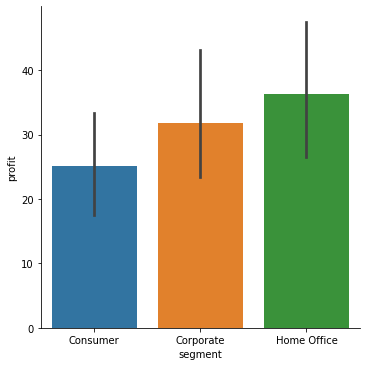

In [23]:
import seaborn as sns
sns.catplot(x="segment", y="profit", kind="bar", data=df)

In [54]:
df['no of items'].value_counts()

3     1656
2     1625
4      794
5      792
1      565
7      415
6      401
9      178
8      158
10      39
11      21
14      21
13      19
12      16
Name: no of items, dtype: int64

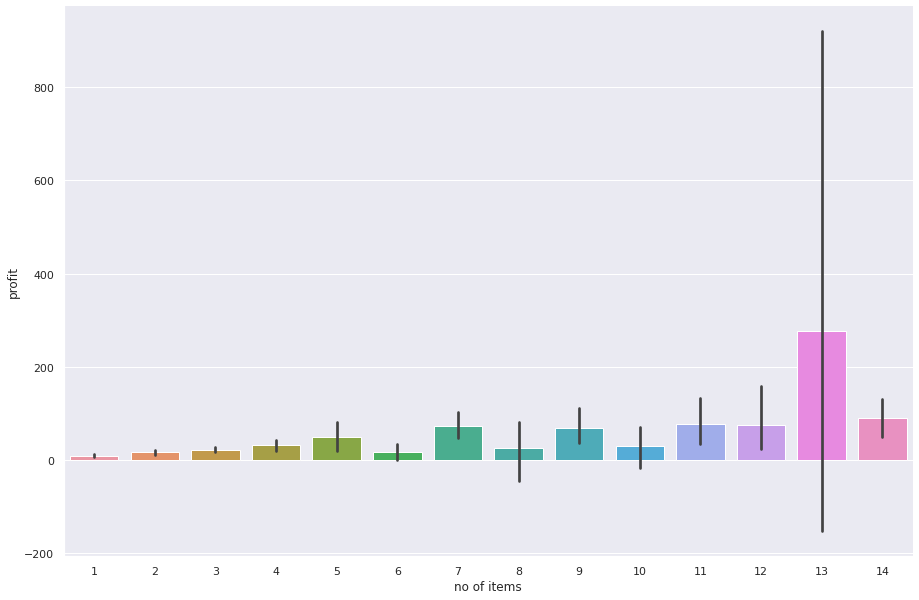

In [52]:
import seaborn as sns
sns.catplot(y="profit", x="no of items", kind="bar", data=df,height=8.27, aspect=12.7/8.27)

In [58]:
187.98 - 155.35 

32.629999999999995

In [69]:


df_cd = df.loc[df['sub-class'] == 'colddrinks']  #155.30
df_cd_Ca = df_cd.loc[df_cd['departure state'] == 'California']
df_cd_Ca[df_cd_Ca['address code'] == 90008]

,id,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,delivery date,address code,departure state,placement date
446,447,Los Angeles,0.2,83.984,2,West,fynota,Corporate,colddrinks,Standard Class,1613,31.4940,2018-05-01,90008,California,2018-05-01
471,472,Los Angeles,0.2,201.584,2,West,fynota,Corporate,colddrinks,Standard Class,1612,20.1584,2018-05-01,90008,California,2018-05-01
1449,1450,Los Angeles,0.2,79.968,4,West,fynota,Corporate,colddrinks,First Class,8709,-17.9928,2018-11-01,90008,California,2018-11-01
1802,1803,Los Angeles,0.2,211.168,4,West,fynota,Corporate,colddrinks,First Class,8796,15.8376,2018-12-01,90008,California,2018-12-01
1852,1853,Los Angeles,0.2,583.800,5,West,fynota,Corporate,colddrinks,First Class,8795,72.9750,2018-12-01,90008,California,2018-12-01
2290,2291,Los Angeles,0.2,88.776,3,West,fynota,Consumer,colddrinks,Standard Class,6293,7.7679,2019-04-01,90008,California,2019-04-01
2506,2507,Los Angeles,0.2,88.752,3,West,fynota,Corporate,colddrinks,Standard Class,1450,11.0940,2019-05-01,90008,California,2019-05-01
3408,3409,Los Angeles,0.2,503.960,5,West,fynota,Consumer,colddrinks,First Class,6955,50.3960,2019-10-01,90008,California,2019-10-01
3692,3693,Los Angeles,0.2,1212.848,7,West,fynota,Home Office,colddrinks,Standard Class,1487,106.1242,2019-11-01,90008,California,2019-11-01
3847,3848,Los Angeles,0.2,135.984,2,West,fynota,Consumer,colddrinks,Second Class,8938,16.9980,2019-12-01,90008,California,2019-12-01


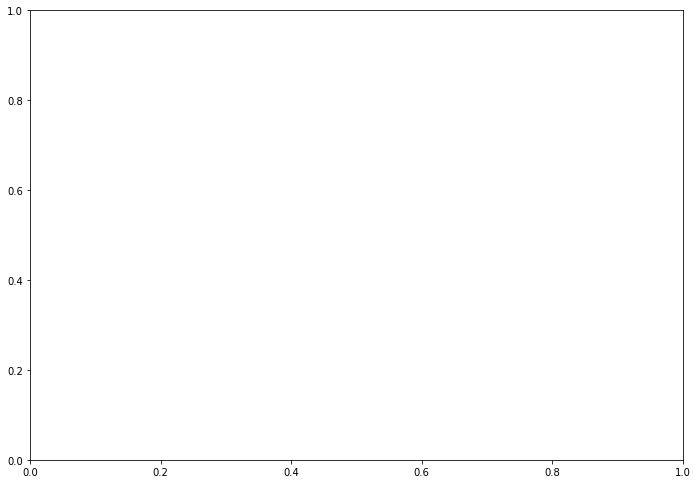

In [34]:
from matplotlib import pyplot
import seaborn

# import mylib

a4_dims = (11.7, 8.27)
# df = mylib.load_data()
fig, ax = pyplot.subplots(figsize=a4_dims)

In [43]:
sns.set(rc={'figure.figsize':(80,60)})

/home/rohit/Desktop/Coneio/nlp/lib/python3.6/site-packages/seaborn/categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


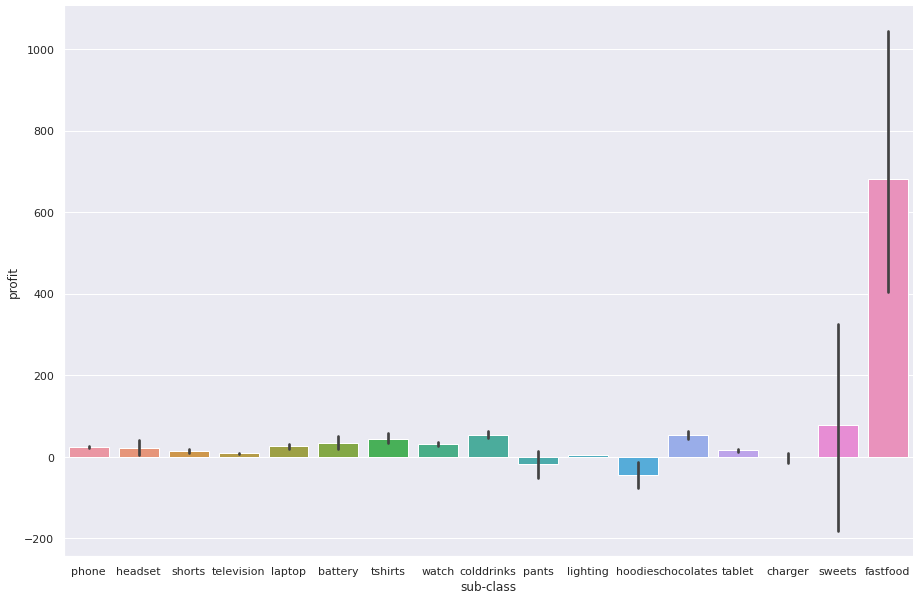

In [48]:
sns.catplot(ax = ax, x="sub-class", y="profit", kind="bar", data=df, height=8.27, aspect=12.7/8.27)

/home/rohit/Desktop/Coneio/nlp/lib/python3.6/site-packages/seaborn/categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


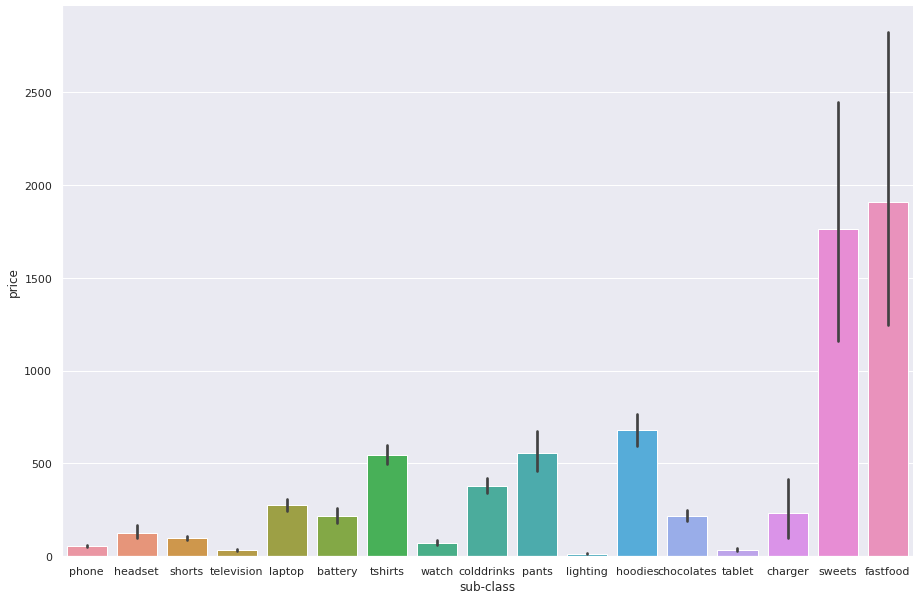

In [49]:
sns.catplot(ax = ax, x="sub-class", y="price", kind="bar", data=df, height=8.27, aspect=12.7/8.27)

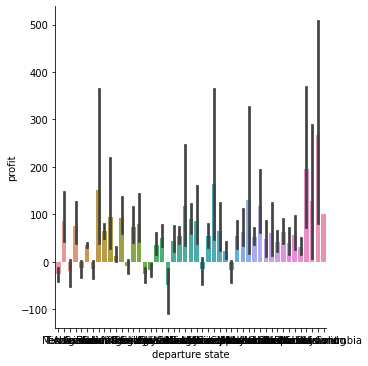

In [21]:
sns.catplot(x="departure state", y="profit", kind="bar", data=df)

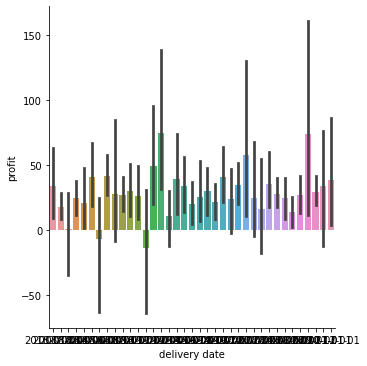

In [31]:
sns.catplot(x="delivery date", y="profit", kind="bar", data=df)

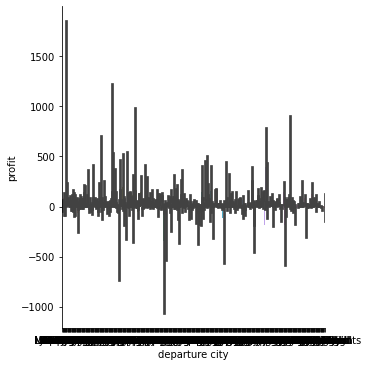

In [24]:
sns.catplot(x="departure city", y="profit", kind="bar", data=df)

In [ ]:
sns.catplot(x="departure city", y="profit", kind="box", data=df)

In [ ]:

#city, code -> 3-4 class

date -> 



In [5]:
df1 = pd.read_csv("test.csv")
df1

,id,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,delivery date,address code,departure state,placement date
0,6701,San Francisco,0.0,24.200,5,West,kariox,Consumer,television,Standard Class,2408,2021-01-01,94122,California,2021-01-01
1,6702,San Francisco,0.2,359.976,3,West,fynota,Consumer,colddrinks,Standard Class,2409,2021-01-01,94122,California,2021-01-01
2,6703,Waterbury,0.0,3.520,2,East,kariox,Consumer,television,Standard Class,5425,2021-01-01,6708,Connecticut,2021-01-01
3,6704,Chicago,0.2,11.520,5,Central,kariox,Consumer,tablet,First Class,7408,2021-01-01,60653,Illinois,2021-01-01
4,6705,Seattle,0.0,242.940,3,West,kariox,Home Office,laptop,Standard Class,733,2021-01-01,98115,Washington,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,9990,New York City,0.0,31.920,4,East,kariox,Consumer,laptop,Second Class,1171,2021-12-01,10035,New York,2021-12-01
3290,9991,New York City,0.0,19.440,3,East,kariox,Consumer,phone,Second Class,1170,2021-12-01,10035,New York,2021-12-01
3291,9992,New York City,0.0,272.940,3,East,kariox,Consumer,laptop,Second Class,1169,2021-12-01,10035,New York,2021-12-01
3292,9993,San Francisco,0.2,113.568,2,West,qexty,Consumer,tshirts,Standard Class,414,2021-12-01,94110,California,2021-12-01
